In [3]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados
cleaned_eur_brl_file_path = "C:/Users/milen/OneDrive/Documentos/TCC/new/Merged_Final_Combined_EUR_BRL.csv"
cleaned_eur_brl_df = pd.read_csv(cleaned_eur_brl_file_path)

# Converter 'Data' para datetime e ordenar o dataframe por data
cleaned_eur_brl_df['Data'] = pd.to_datetime(cleaned_eur_brl_df['Data'])
cleaned_eur_brl_df.sort_values('Data', inplace=True)

# Corrigir o formato de 'Preco_Dolar', convertendo de string para float
cleaned_eur_brl_df['Preco_Dolar'] = cleaned_eur_brl_df['Preco_Dolar'].str.replace(',', '.').astype(float)

# Padronizar a coluna 'Preco_Dolar'
scaler = StandardScaler()
cleaned_eur_brl_df['Preco_Dolar_Scaled'] = scaler.fit_transform(cleaned_eur_brl_df[['Preco_Dolar']])

# Dividir os dados em treino e teste
X = cleaned_eur_brl_df.index.values.reshape(-1, 1)  # Usando o índice como recurso
y = cleaned_eur_brl_df['Preco_Dolar_Scaled'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Padronizar os recursos de treino e teste
scaler_train = StandardScaler()
X_train_scaled = scaler_train.fit_transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

# Criar e treinar o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_test_pred = rf_model.predict(X_test_scaled)

# Reverter a padronização para exibir os valores em sua escala original
y_test_pred_reversed = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test_reversed = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Adicionar a coluna 'Data' ao DataFrame de previsões
eur_brl_test_prediction_df = pd.DataFrame({
    'Actual': y_test_reversed,
    'Predicted': y_test_pred_reversed,
    'Data': cleaned_eur_brl_df['Data'].values[-len(y_test):]
})

# Exibir as primeiras previsões e os valores reais
print(eur_brl_test_prediction_df.head())

#adicionar com e sem clima



   Actual  Predicted       Data
0  122.59   119.5823 2018-06-08
1  121.29   119.5823 2018-06-11
2  122.49   119.5823 2018-06-12
3  121.02   119.5823 2018-06-13
4  118.76   119.5823 2018-06-14


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Carregue seus dados aqui
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Preparação dos dados
# Substitua 'Preco_Dolar' pela sua variável alvo
features = data.drop('Preco_Dolar', axis=1)
target = data['Preco_Dolar']

# Convertendo variáveis categóricas em numéricas (se necessário)
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])

# Divisão dos dados em treino e teste
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42)

# Definição dos hiperparâmetros para a busca em grade
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo Random Forest para a busca em grade
rf = RandomForestRegressor(random_state=42)

# Criando o objeto Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Realizando a busca em grade
grid_search.fit(features_train, target_train)

# Melhores hiperparâmetros e pontuação
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Exibindo os resultados
print("Melhores Hiperparâmetros:", best_params)
print("Melhor Score (RMSE):", best_score)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Melhores Hiperparâmetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor Score (RMSE): 3.259200784775484


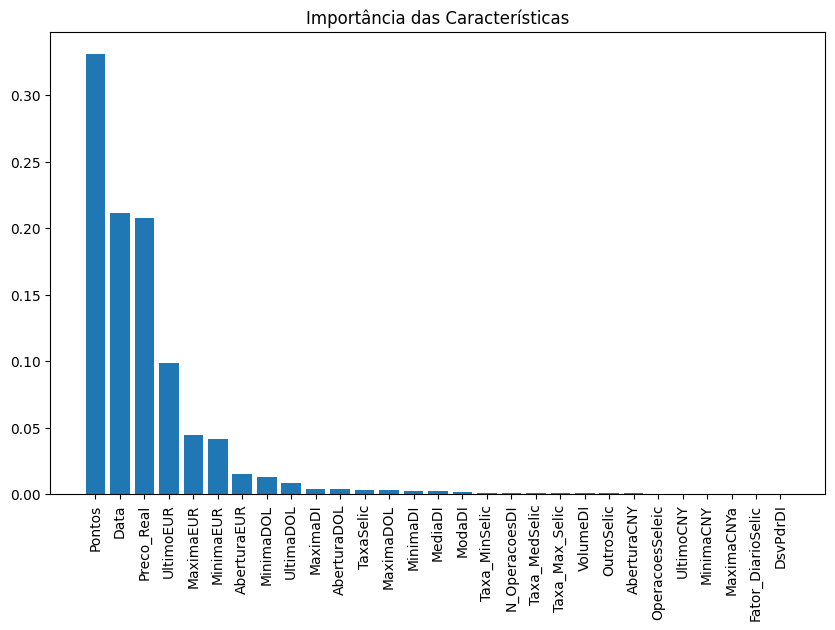

RMSE no conjunto de teste: 3.4631246936434477
R² no conjunto de teste: 0.9967634860343543
RMSE no conjunto de validação: 2.9402062096072163
R² no conjunto de validação: 0.9977145645904466


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Preparação dos dados
features = data.drop('Preco_Dolar', axis=1)
target = data['Preco_Dolar']

# Convertendo variáveis categóricas em numéricas
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])

# Divisão dos dados em treino, teste e validação
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.3, random_state=42)
features_test, features_val, target_test, target_val = train_test_split(
    features_test, target_test, test_size=0.5, random_state=42)

# Melhores hiperparâmetros (substitua pelos seus valores)
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Re-treinando o modelo com os melhores hiperparâmetros
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(features_train, target_train)

# Avaliando o modelo no conjunto de teste
predictions_test = rf_best.predict(features_test)
test_rmse = np.sqrt(mean_squared_error(target_test, predictions_test))
test_r2 = r2_score(target_test, predictions_test)

# Avaliando o modelo no conjunto de validação
predictions_val = rf_best.predict(features_val)
val_rmse = np.sqrt(mean_squared_error(target_val, predictions_val))
val_r2 = r2_score(target_val, predictions_val)

# Análise de importância das características
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

# Exibindo a importância das características
plt.figure(figsize=(10, 6))
plt.title('Importância das Características')
plt.bar(range(features_train.shape[1]), importances[indices])
plt.xticks(range(features_train.shape[1]), features_train.columns[indices], rotation=90)
plt.show()

# Exibindo resultados
print('RMSE no conjunto de teste:', test_rmse)
print('R² no conjunto de teste:', test_r2)
print('RMSE no conjunto de validação:', val_rmse)
print('R² no conjunto de validação:', val_r2)


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Convertendo 'Data' para datetime
data['Data'] = pd.to_datetime(data['Data'])

# Calculando a diferença diária do 'Preco_Dolar'
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()

# Removendo a primeira linha que agora contém NaN
data = data.dropna()

# Separando os dados para treino, validação e teste
# Dados antes de 2023 para treino e validação, dados de 2023 em diante para teste
cutoff_date = pd.to_datetime("2023-01-01")
train_val_data = data[data['Data'] < cutoff_date]
test_data = data[data['Data'] >= cutoff_date]

# Preparação dos dados
features_train_val = train_val_data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target_train_val = train_val_data['Diff_Preco_Dolar']
features_test = test_data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target_test = test_data['Diff_Preco_Dolar']

# Dividindo treino e validação
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.2, random_state=42)

# Melhores hiperparâmetros
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Treinamento e avaliação
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(features_train, target_train)

# Avaliação
predictions_test = rf_best.predict(features_test)
test_rmse = np.sqrt(mean_squared_error(target_test, predictions_test))
test_r2 = r2_score(target_test, predictions_test)

print('Test RMSE:', test_rmse)
print('Test R²:', test_r2)


Test RMSE: 3.084768793622199
Test R²: 0.003117782741205666


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Convertendo 'Data' para datetime
data['Data'] = pd.to_datetime(data['Data'])

# Calculando a diferença diária do 'Preco_Dolar'
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()

# Removendo a primeira linha que agora contém NaN
data = data.dropna()

# Separando os dados para treino, validação e teste
cutoff_date = pd.to_datetime("2023-01-01")
train_val_data = data[data['Data'] < cutoff_date]
test_data = data[data['Data'] >= cutoff_date]

# Preparação dos dados
features_train_val = train_val_data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target_train_val = train_val_data['Diff_Preco_Dolar']

# Dividindo treino e validação
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.2, random_state=42)

# Melhores hiperparâmetros
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Treinamento e avaliação
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(features_train, target_train)

# Preparar dados para previsão do último dia
last_day_features = test_data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1).iloc[-1:]
last_day_target = test_data['Diff_Preco_Dolar'].iloc[-1]

# Fazer a previsão para o último dia
last_day_prediction = rf_best.predict(last_day_features)

# Comparando com o valor real
print('Previsão para o último dia:', last_day_prediction[0])
print('Valor real para o último dia:', last_day_target)


Previsão para o último dia: 1.5483776768802795
Valor real para o último dia: -1.0200000000000102


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Convertendo 'Data' para datetime
data['Data'] = pd.to_datetime(data['Data'])

# Calculando a diferença diária dos 'Pontos'
data['Diff_Pontos'] = data['Pontos'].diff()

# Removendo a primeira linha que agora contém NaN
data = data.dropna()

# Separando os dados para treino, validação e teste
cutoff_date = pd.to_datetime("2023-01-01")
train_val_data = data[data['Data'] < cutoff_date]
test_data = data[data['Data'] >= cutoff_date]

# Preparação dos dados
features_train_val = train_val_data.drop(['Preco_Dolar', 'Diff_Pontos', 'Data'], axis=1)
target_train_val = train_val_data['Diff_Pontos']

# Dividindo treino e validação
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.2, random_state=42)

# Melhores hiperparâmetros
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Treinamento e avaliação
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(features_train, target_train)

# Preparar dados para previsão do último dia
last_day_features = test_data.drop(['Preco_Dolar', 'Diff_Pontos', 'Data'], axis=1).iloc[-1:]
last_day_target = test_data['Diff_Pontos'].iloc[-1]

# Fazer a previsão para o último dia
last_day_prediction = rf_best.predict(last_day_features)

# Comparando com o valor real
print('Previsão para o último dia (Diferença de Pontos):', last_day_prediction[0])
print('Valor real para o último dia (Diferença de Pontos):', last_day_target)


Previsão para o último dia (Diferença de Pontos): -14004.574333353668
Valor real para o último dia (Diferença de Pontos): 0.0


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Convertendo 'Data' para datetime
data['Data'] = pd.to_datetime(data['Data'])

# Calculando a diferença diária dos 'Pontos'
data['Diff_Pontos'] = data['Pontos'].diff()

# Removendo a primeira linha que agora contém NaN
data = data.dropna()

# Separando os dados para treino, validação e teste
cutoff_date = pd.to_datetime("2023-01-01")
train_val_data = data[data['Data'] < cutoff_date]
test_data = data[data['Data'] >= cutoff_date]

# Preparação dos dados
features_train_val = train_val_data.drop(['Preco_Dolar', 'Diff_Pontos', 'Data'], axis=1)
target_train_val = train_val_data['Diff_Pontos']

# Dividindo treino e validação
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.2, random_state=42)

# Melhores hiperparâmetros
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Treinamento e avaliação
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(features_train, target_train)

# Preparar dados para previsão do último dia
last_day_features = test_data.drop(['Preco_Dolar', 'Diff_Pontos', 'Data'], axis=1).iloc[-1:]
last_day_target = np.array([test_data['Diff_Pontos'].iloc[-1]])

# Fazer a previsão para o último dia
last_day_prediction = rf_best.predict(last_day_features)

# Calculando MSE e R² para a previsão do último dia
last_day_mse = mean_squared_error(last_day_target, last_day_prediction)
last_day_r2 = r2_score(last_day_target, last_day_prediction)

# Comparando com o valor real e exibindo métricas
print('Previsão para o último dia (Diferença de Pontos):', last_day_prediction[0])
print('Valor real para o último dia (Diferença de Pontos):', last_day_target[0])
print('MSE para o último dia:', last_day_mse)
print('R² para o último dia:', last_day_r2)



Previsão para o último dia (Diferença de Pontos): -14004.574333353668
Valor real para o último dia (Diferença de Pontos): 0.0
MSE para o último dia: 196128102.25842834
R² para o último dia: nan


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Convertendo 'Data' para datetime e calculando a diferença diária do 'Preco_Dolar'
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Separando os dados para treino, validação e teste
cutoff_date = pd.to_datetime("2023-01-01")
train_val_data = data[data['Data'] < cutoff_date]
test_data = data[data['Data'] >= cutoff_date]

# Preparação dos dados
features_train_val = train_val_data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target_train_val = train_val_data['Diff_Preco_Dolar']

# Dividindo treino e validação
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.2, random_state=42)

# Definindo o espaço de busca para os hiperparâmetros
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Criando o modelo de Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_search.fit(features_train, target_train)

# Melhores hiperparâmetros encontrados
best_params = random_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Treinando o modelo com os melhores hiperparâmetros
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(features_train, target_train)

window_size = 30  # Tamanho da janela definido
mse_values = []
r2_values = []
all_predictions = []  # Armazenará todas as previsões
all_actual_values = []  # Armazenará todos os valores reais

for start in range(0, len(test_data) - window_size + 1):
    end = start + window_size
    test_subset = test_data.iloc[start:end]
    features_test = test_subset.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
    target_test = test_subset['Diff_Preco_Dolar']

    prediction = rf_best.predict(features_test)
    mse = mean_squared_error(target_test, prediction)
    r2 = r2_score(target_test, prediction)

    mse_values.append(mse)
    r2_values.append(r2)
    all_predictions.extend(prediction)
    all_actual_values.extend(target_test)

# Exibindo os resultados
print("Média do MSE:", np.mean(mse_values))
print("Média do R²:", np.mean(r2_values))

# Exibir previsões e valores reais para cada ponto no conjunto de teste
for i in range(len(all_predictions)):
    print(f"Previsão: {all_predictions[i]}, Valor Real: {all_actual_values[i]}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Melhores hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Média do MSE: 9.169906827600714
Média do R²: -0.026436455335205306
Previsão: -0.5388847557582251, Valor Real: -4.180000000000007
Previsão: -0.035530424675560356, Valor Real: -2.509999999999991
Previsão: 0.7219395209809427, Valor Real: -2.5900000000000034
Previsão: 0.5077378813138759, Valor Real: 3.0100000000000193
Previsão: 0.2423594928211084, Valor Real: 4.909999999999997
Previsão: -0.2512967651908094, Valor Real: -4.3700000000000045
Previsão: -0.27733854241114864, Valor Real: -4.689999999999998
Previsão: -0.269794018614506, Valor Real: -4.010000000000019
Previsão: 0.03420821466144436, Valor Real: 4.940000000000026
Previsão: 0.11705240412751305, Valor Real: -1.5
Previsão: -0.927539697754279, Valor Real: -0.17000000000001592
Previsão: 0.34301540672333497, Valor Real: 0.9000000000000057
Previsão: -0.9739641917058816, Valor Real: 3.4799999999999898
Previsão: -0.3235984542545968, Valor Real: 3.5900000000000034
Previsão: -0.3543837233079038, Valor Real: -0.6599999999999966
Previsão: -0.655

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Carregar e preparar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima_dolar.csv')
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Selecionando features e target
features = data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target = data['Diff_Preco_Dolar']

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

# Dividindo os dados em treino, validação e teste
train_size = int(len(scaled_features) * 0.6)
val_size = int(len(scaled_features) * 0.2)
test_size = len(scaled_features) - train_size - val_size
train_features, val_features, test_features = scaled_features[:train_size, :], scaled_features[train_size:train_size+val_size, :], scaled_features[train_size+val_size:, :]
train_target, val_target, test_target = scaled_target[:train_size], scaled_target[train_size:train_size+val_size], scaled_target[train_size+val_size:]

# Convertendo os dados em formato apropriado para o LSTM
def create_dataset(features, target, time_step=1):
    dataX, dataY = [], []
    for i in range(len(features)-time_step-1):
        a = features[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(target[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_features, train_target, time_step)
X_val, y_val = create_dataset(val_features, val_target, time_step)
X_test, y_test = create_dataset(test_features, test_target, time_step)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=100, verbose=1)

# Previsões no conjunto de teste
test_predict = model.predict(X_test)

# Invertendo a normalização para obter previsões em escala original
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculando MSE e R2
mse = mean_squared_error(y_test[0], test_predict[:,0])
r2 = r2_score(y_test[0], test_predict[:,0])

print(f"MSE: {mse}, R2: {r2}")


ValueError: could not convert string to float: '338.045.191.292.876'

c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MSE: 9.457048655298891, R2: -0.0010943263148954774
Diferenças entre valores previstos e reais na última semana:
6478         NaN
6479   -1.788789
6480    5.491211
6481   -3.278789
6482    7.901211
6483    2.241211
6484    0.471211
6485         NaN
dtype: float64


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


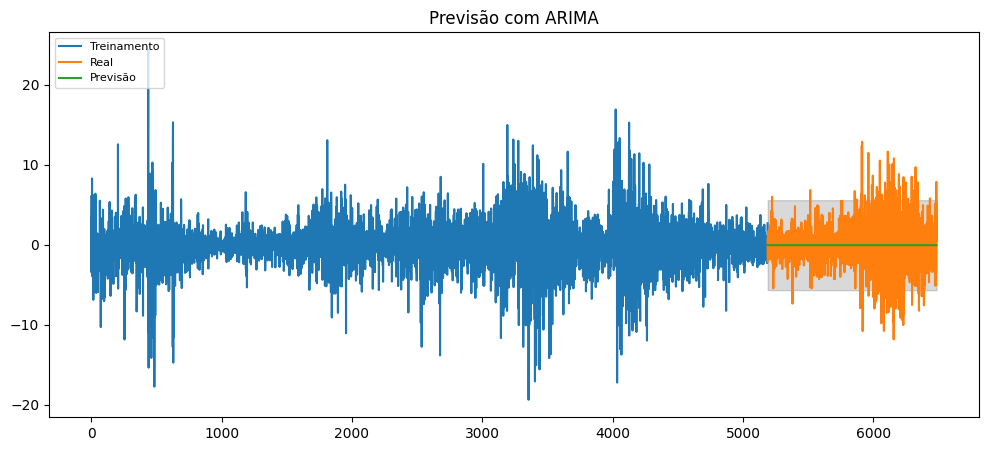

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar e preparar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Definindo a variável alvo
target = data['Diff_Preco_Dolar']

# Dividindo os dados em treino e teste
train_size = int(len(target) * 0.8)
train_data, test_data = target[:train_size], target[train_size:]

# Construindo e ajustando o modelo ARIMA
model = ARIMA(train_data, order=(1, 1, 1))  # Exemplo: ARIMA(1,1,1)
fitted_model = model.fit()

# Fazendo previsões
forecast = fitted_model.get_forecast(len(test_data))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

# Calculando métricas de desempenho
mse = mean_squared_error(test_data, fc)
r2 = r2_score(test_data, fc)

print(f"MSE: {mse}, R2: {r2}")

# Calculando a diferença entre os valores previstos e os reais para a última semana
last_week_predicted = fc[-7:]
last_week_actual = test_data.iloc[-7:]
differences = last_week_actual - last_week_predicted

# Mostrando as diferenças
print("Diferenças entre valores previstos e reais na última semana:")
print(differences)

# Plotando os resultados
forecast_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Real')
plt.plot(forecast_series, label='Previsão')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Previsão com ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar e preparar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Definindo a variável alvo
target = data['Diff_Preco_Dolar']

# Dividindo os dados em treino e teste
train_size = int(len(target) * 0.8)
train_data, test_data = target[:train_size], target[train_size:]

# Construindo e ajustando o modelo ARIMA
model = ARIMA(train_data, order=(1, 1, 1))  # Exemplo: ARIMA(1,1,1)
fitted_model = model.fit()

# Fazendo previsões
forecast = fitted_model.get_forecast(len(test_data))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

# Calculando métricas de desempenho
mse = mean_squared_error(test_data, fc)
r2 = r2_score(test_data, fc)

print(f"MSE: {mse}, R2: {r2}")

# Calculando a diferença entre os valores previstos e os reais para a última semana
last_week_predicted = fc[-7:]
last_week_actual = test_data.iloc[-7:]
differences = last_week_actual - last_week_predicted

# Mostrando as diferenças
print("Diferenças entre valores previstos e reais na última semana:")
print(differences)

# Plotando os resultados
forecast_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test_data.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Real')
plt.plot(forecast_series, label='Previsão')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Previsão com ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Teste de Dickey-Fuller: p-value = 0.000000


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\milen\AppData\Local

Melhor MSE: 9.445605154616128, Melhor R2: -0.0005898464972444728, Melhor Ordem: (2, 0, 1)
Diferenças entre valores previstos e reais na última semana:
6480         NaN
6481   -3.300992
6482    7.879008
6483    2.219008
6484    0.449008
6485    2.879008
6486    0.469008
6487         NaN
dtype: float64
Data		Valor Real	Valor Previsto	Diferença
2023-11-01	-3.32		-0.02		nan
2023-11-03	7.86		-0.02		-3.30
2023-11-06	2.20		-0.02		7.88
2023-11-07	0.43		-0.02		2.22
2023-11-08	2.86		-0.02		0.45
2023-11-09	0.45		-0.02		2.88
2023-11-10	-1.02		-0.02		0.47


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


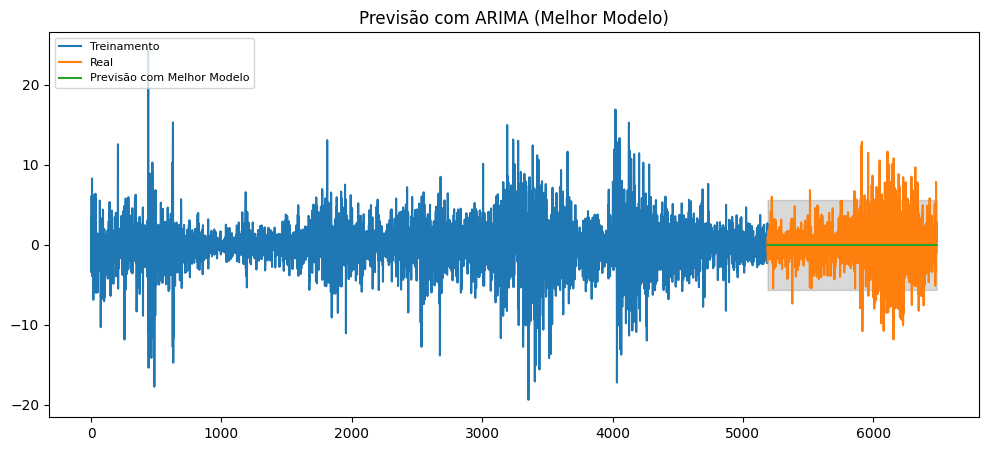

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Carregar e preparar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Definindo a variável alvo
target = data['Diff_Preco_Dolar']

# Dividindo os dados em treino e teste
train_size = int(len(target) * 0.8)
train_data, test_data = target[:train_size], target[train_size:]

# Teste de Dickey-Fuller para verificar estacionariedade
result = adfuller(train_data)
print('Teste de Dickey-Fuller: p-value = %f' % result[1])

# Melhores métricas encontradas
best_mse = float('inf')
best_r2 = float('-inf')
best_order = None

# Testando diferentes combinações de parâmetros
for p in range(4):
    for d in range(3):
        for q in range(4):
            try:
                model = ARIMA(train_data, order=(p, d, q))
                fitted_model = model.fit()

                # Fazendo previsões
                forecast = fitted_model.get_forecast(len(test_data))
                fc = forecast.predicted_mean

                # Calculando métricas de desempenho
                mse = mean_squared_error(test_data, fc)
                r2 = r2_score(test_data, fc)

                # Atualizando as melhores métricas
                if r2 > best_r2:
                    best_r2 = r2
                    best_mse = mse
                    best_order = (p, d, q)

            except:
                continue

# Exibindo os melhores resultados
print(f"Melhor MSE: {best_mse}, Melhor R2: {best_r2}, Melhor Ordem: {best_order}")

# Treinando o modelo com a melhor combinação de parâmetros
best_model = ARIMA(train_data, order=best_order)
fitted_best_model = best_model.fit()

# Fazendo previsões com o melhor modelo
forecast_best = fitted_best_model.get_forecast(len(test_data))
fc_best = forecast_best.predicted_mean
conf_best = forecast_best.conf_int(alpha=0.05)

# Calculando a diferença entre os valores previstos e os reais para a última semana
last_week_predicted = fc_best[-7:]
last_week_actual = test_data.iloc[-7:]
differences = last_week_actual - last_week_predicted

# Mostrando as diferenças
print("Diferenças entre valores previstos e reais na última semana:")
print(differences)


# Calculando a diferença entre os valores previstos e os reais para a última semana
last_week_dates = data['Data'].iloc[train_size:].tail(7)  # Últimas 7 datas do conjunto de teste
last_week_predicted = fc_best[-7:]
last_week_actual = test_data.iloc[-7:]
differences = last_week_actual - last_week_predicted

# Mostrando as diferenças junto com as datas
print("Data\t\tValor Real\tValor Previsto\tDiferença")
for date, actual, predicted, diff in zip(last_week_dates, last_week_actual, last_week_predicted, differences):
    print(f"{date.strftime('%Y-%m-%d')}\t{actual:.2f}\t\t{predicted:.2f}\t\t{diff:.2f}")


# Plotando os resultados
forecast_series_best = pd.Series(fc_best, index=test_data.index)
lower_series_best = pd.Series(conf_best.iloc[:, 0], index=test_data.index)
upper_series_best = pd.Series(conf_best.iloc[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Real')
plt.plot(forecast_series_best, label='Previsão com Melhor Modelo')
plt.fill_between(lower_series_best.index, lower_series_best, upper_series_best, color='k', alpha=.15)
plt.title('Previsão com ARIMA (Melhor Modelo)')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Teste de Dickey-Fuller: p= 0.0


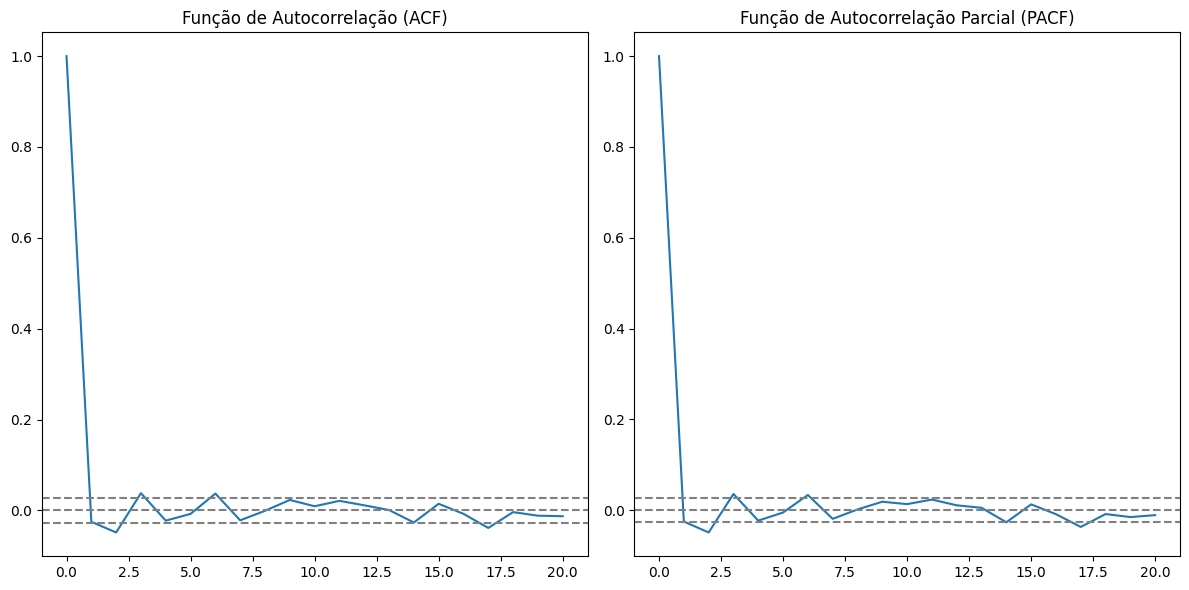

In [9]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Teste de Dickey-Fuller para verificar a estacionaridade
dftest = adfuller(train_data, autolag='AIC')
print("Teste de Dickey-Fuller: p=", dftest[1])

# Desenhar gráficos ACF e PACF
lag_acf = acf(train_data, nlags=20)
lag_pacf = pacf(train_data, nlags=20, method='ols')

# ACF
plt.figure(figsize=(12, 6))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.title('Função de Autocorrelação (ACF)')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_data)), linestyle='--', color='gray')
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar e preparar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Definindo a variável alvo
target = data['Diff_Preco_Dolar']

# Dividindo os dados em treino e teste
train_size = int(len(target) * 0.8)
train_data, test_data = target[:train_size], target[train_size:]

# Parâmetros iniciais para SARIMA
best_mse = float('inf')
best_r2 = float('-inf')
best_order = None
best_seasonal_order = None

# Definindo a ordem sazonal (ajuste esses valores com base em sua análise)
P = D = Q = 1
S = 365  # Exemplo de período anual

# Testando diferentes combinações de parâmetros para SARIMA
for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
                fitted_model = model.fit()

                # Fazendo previsões
                forecast = fitted_model.get_forecast(len(test_data))
                fc = forecast.predicted_mean

                # Calculando métricas de desempenho
                mse = mean_squared_error(test_data, fc)
                r2 = r2_score(test_data, fc)

                # Atualizando as melhores métricas
                if r2 > best_r2:
                    best_r2 = r2
                    best_mse = mse
                    best_order = (p, d, q)
                    best_seasonal_order = (P, D, Q, S)

            except Exception as e:
                print(f"Erro com a ordem (p={p}, d={d}, q={q}): {e}")

# Exibindo os melhores resultados para SARIMA
print(f"Melhor SARIMA MSE: {best_mse}, Melhor R2: {best_r2}, Melhor Ordem: {best_order}, Melhor Ordem Sazonal: {best_seasonal_order}")

# Treinando o modelo com a melhor combinação de parâmetros
best_model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order)
fitted_best_model = best_model.fit()

# Fazendo previsões com o melhor modelo
forecast_best = fitted_best_model.get_forecast(len(test_data))
fc_best = forecast_best.predicted_mean
conf_best = forecast_best.conf_int(alpha=0.05)

# Calculando a diferença entre os valores previstos e os reais para a última semana
last_week_dates = data['Data'].iloc[train_size:].tail(7)  # Últimas 7 datas do conjunto de teste
last_week_predicted = fc_best[-7:]
last_week_actual = test_data.iloc[-7:]
differences = last_week_actual - last_week_predicted

# Mostrando as diferenças junto com as datas
print("\nData\t\tValor Real\tValor Previsto\tDiferença")
for date, actual, predicted, diff in zip(last_week_dates, last_week_actual, last_week_predicted, differences):
    print(f"{date.strftime('%Y-%m-%d')}\t{actual:.2f}\t\t{predicted:.2f}\t\t{diff:.2f}")

# Plotando os resultados
forecast_series_best = pd.Series(fc_best, index=test_data.index)
lower_series_best = pd.Series(conf_best.iloc[:, 0], index=test_data.index)
upper_series_best = pd.Series(conf_best.iloc[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Treinamento')
plt.plot(test_data, label='Real')
plt.plot(forecast_series_best, label='Previsão com Melhor Modelo SARIMA')
plt.fill_between(lower_series_best.index, lower_series_best, upper_series_best, color='k', alpha=.15)
plt.title('Previsão com SARIMA (Melhor Modelo)')
plt.legend(loc='upper left', fontsize=8)
plt.show()


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Erro com a ordem (p=0, d=0, q=0): Unable to allocate 20.7 GiB for an array with shape (731, 731, 5190) and data type float64


c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milen\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Carregar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')

# Convertendo 'Data' para datetime e calculando a diferença diária do 'Preco_Dolar'
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Separando os dados para treino, validação e teste
cutoff_date = pd.to_datetime("2023-01-01")
train_val_data = data[data['Data'] < cutoff_date]
test_data = data[data['Data'] >= cutoff_date]

# Preparação dos dados
features_train_val = train_val_data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target_train_val = train_val_data['Diff_Preco_Dolar']

# Dividindo treino e validação
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.2, random_state=42)

# Definindo o espaço de busca para os hiperparâmetros do XGBoost
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
    'subsample': [0.6, 0.7, 0.8, 0.9]
}

# Criando o modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Randomized Search para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(estimator = xgb_model, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_search.fit(features_train, target_train)

# Melhores hiperparâmetros encontrados
best_params = random_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Treinando o modelo com os melhores hiperparâmetros
xgb_best = xgb.XGBRegressor(**best_params, random_state=42)
xgb_best.fit(features_train, target_train)

# Implementação da Janela Deslizante na Fase de Teste
window_size = 30  # Defina o tamanho da janela conforme necessário
mse_values = []
r2_values = []
all_predictions = []  # Armazenará todas as previsões
all_actual_values = []  # Armazenará todos os valores reais

for start in range(0, len(test_data) - window_size + 1):
    end = start + window_size
    test_subset = test_data.iloc[start:end]
    features_test = test_subset.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
    target_test = test_subset['Diff_Preco_Dolar']

    prediction = xgb_best.predict(features_test)
    mse = mean_squared_error(target_test, prediction)
    r2 = r2_score(target_test, prediction)

    mse_values.append(mse)
    r2_values.append(r2)
    all_predictions.extend(prediction)
    all_actual_values.extend(target_test)

# Exibindo os resultados
print("Média do MSE:", np.mean(mse_values))
print("Média do R²:", np.mean(r2_values))

# Exibir previsões e valores reais para cada ponto no conjunto de teste
for i in range(len(all_predictions)):
    print(f"Previsão: {all_predictions[i]}, Valor Real: {all_actual_values[i]}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Carregar e preparar dados
data = pd.read_csv('C:/Users/milen/OneDrive/Documentos/TCC/new/sem_clima.csv')
data['Data'] = pd.to_datetime(data['Data'])
data['Diff_Preco_Dolar'] = data['Preco_Dolar'].diff()
data = data.dropna()

# Selecionando features e target
features = data.drop(['Preco_Dolar', 'Diff_Preco_Dolar', 'Data'], axis=1)
target = data['Diff_Preco_Dolar']

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

# Dividindo os dados em treino e teste
train_size = int(len(scaled_features) * 0.8)
test_size = len(scaled_features) - train_size
train_features, test_features = scaled_features[0:train_size,:], scaled_features[train_size:len(scaled_features),:]
train_target, test_target = scaled_target[0:train_size], scaled_target[train_size:len(scaled_features)]

# Convertendo os dados em formato apropriado para o LSTM
def create_dataset(features, target, time_step=1):
    dataX, dataY = [], []
    for i in range(len(features)-time_step-1):
        a = features[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(target[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_features, train_target, time_step)
X_test, y_test = create_dataset(test_features, test_target, time_step)

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1)

# Previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertendo a normalização para obter previsões em escala original
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculando MSE e R2
mse = mean_squared_error(y_test[0], test_predict[:,0])
r2 = r2_score(y_test[0], test_predict[:,0])

print(f"MSE: {mse}, R2: {r2}")


Epoch 1/100
82/82 [==============================] - 2s 2ms/step - loss: 0.0271
Epoch 2/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 6/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 10/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 11/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 12/100
82/82 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 13/100
82/82 [=================